In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

The fundamental goal of portfolio theory is to allocate your investments between multiple assets optimally. A Markowitz mean-variance optimization (MVO) is an approach to choosing how to allocate money between multiple assets by considering the risk-return trade-off of asset combinations.

The approach considers the expected returns and covariance for all assets. It returns a set of portfolios where:

The expected return is greater than any other with the same or lesser risk
The risk is less than any other with the same expected return

In [2]:
data = pd.read_csv('stock_data.txt', index_col = 'Date', parse_dates = True)
data.head()

,Delta,Jet Blue,Chevron,Exxon,Adobe,Honeywell
Date,,,,,,
2007-12-31,14.64,5.94,94.37,94.39,42.58,60.89
2008-03-31,8.65,5.45,84.95,85.69,35.69,55.72
2008-06-30,5.42,3.58,98.30,86.81,39.63,49.26
2008-09-30,7.50,4.70,78.85,75.62,36.72,41.55
2008-12-31,10.97,6.80,72.90,78.42,20.85,32.61


In [3]:
data.head()

,Delta,Jet Blue,Chevron,Exxon,Adobe,Honeywell
Date,,,,,,
2007-12-31,14.64,5.94,94.37,94.39,42.58,60.89
2008-03-31,8.65,5.45,84.95,85.69,35.69,55.72
2008-06-30,5.42,3.58,98.30,86.81,39.63,49.26
2008-09-30,7.50,4.70,78.85,75.62,36.72,41.55
2008-12-31,10.97,6.80,72.90,78.42,20.85,32.61


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 42 entries, 2007-12-31 to 2018-03-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Delta      42 non-null     float64
 1   Jet Blue   42 non-null     float64
 2   Chevron    42 non-null     float64
 3   Exxon      42 non-null     float64
 4   Adobe      42 non-null     float64
 5   Honeywell  42 non-null     float64
dtypes: float64(6)
memory usage: 2.3 KB


<AxesSubplot:xlabel='Date'>

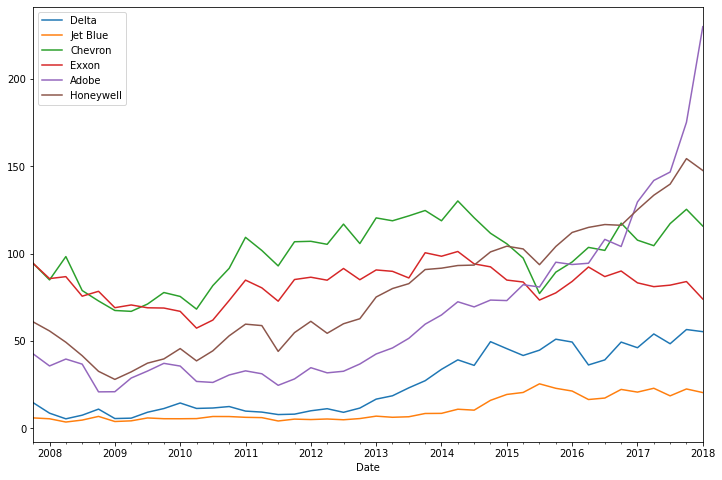

In [5]:
data.plot(figsize=(12,8))

Typically, when we download stock data, the information is formatted as asset values at the end of a period (daily, monthly, quarterly). When we calculate the efficient frontiers, we need to structure the data as the percent returned over each period.
Before we can calculate the expected return of a portfolio, we need to find the expected return of each asset.


In [6]:
returns = data.pct_change()
returns.dropna(inplace=True)
returns.head()

,Delta,Jet Blue,Chevron,Exxon,Adobe,Honeywell
Date,,,,,,
2008-03-31,-0.409153,-0.082492,-0.099820,-0.092171,-0.161813,-0.084907
2008-06-30,-0.373410,-0.343119,0.157151,0.013070,0.110395,-0.115937
2008-09-30,0.383764,0.312849,-0.197864,-0.128902,-0.073429,-0.156516
2008-12-31,0.462667,0.446809,-0.075460,0.037027,-0.432190,-0.215162
2009-03-31,-0.491340,-0.429412,-0.074897,-0.119612,0.003837,-0.141674


<AxesSubplot:xlabel='Date'>

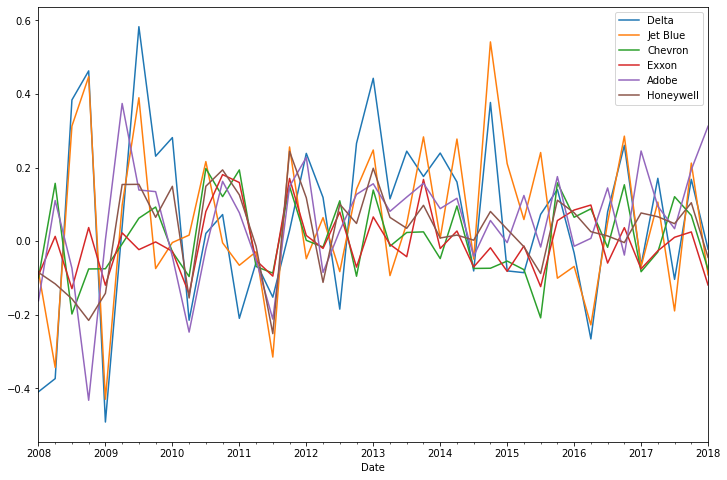

In [7]:
returns.plot(figsize=(12,8))

When calculating the efficient frontier, we need to find the average expected return for each asset.

In [8]:
returns.mean()

Delta        0.062093
Jet Blue     0.052361
Chevron      0.010323
Exxon       -0.002444
Adobe        0.053780
Honeywell    0.028439
dtype: float64

## Weight of an Asset

To estimate the return and volatility of a portfolio with multiple assets, we need first to calculate the amount that we invest in each asset.

The weight of an asset is the fraction of the money invested in the asset (the numerator of the fraction below), divided by the total amount of money in the portfolio (the denominator of the fraction below):


$$w_n = \frac{c_n}{total}$$	

Let’s say you had $5,000 that you want to invest in four companies. Below, we calculate the weight of each asset, given the amount invested.

Company 1: $500

$$w_{1} = \frac{\$500}{\$5,000} =.1$$

But we’re interested in the return of a portfolio with multiple assets. To calculate the expected return of a portfolio, you must find the weighted sum of the return for each individual asset:

$$ER = w_1 R_1 + w_2 R_2 + w_3 R_3 + w_4 R_4$$

## Covariance Matrix

It would be nice if every asset made large, consistent positive returns every period. If that were the case, we could invest all of our money in the asset with the highest expected return. But, the return of any given asset is unpredictable.

The measure of an asset’s unpredictability is called its risk. We can estimate the risk of an asset by calculating its variance.

When we quantify the risk of a portfolio, in addition to the variance of each asset, we must calculate the covariance between each asset and every other asset. If two assets have a positive covariance, then they respond similarly to market forces. Assets with a negative covariance will not.

For example:

    Oil prices affect car sales, which will impact automobile company returns (Ford, Honda, Toyota, General Motors)

    Increasing farm subsidies make crop production cheaper, which will increase agriculture returns. Agriculture companies, like Tyson, Monsanto, and Cargill will likely all increase in value (positive covariance).

    Tariffs on electronics may affect cell phone sales, which will decrease returns for hardware manufacturing companies, like Huawei, Apple, and Google (positive covariance).

Assets can have a positive covariance, negative covariance, or no covariance:

    Positive covariance — when one asset increases in value, the other usually increases in value. The covariance value will be greater than 0.

    Negative covariance — when one asset increases in value, the other usually decreases in value. The covariance value will be less than 0.

    Uncorrelated assets — when there is no quantifiable pattern to the response of two assets. The covariance value is equal to 0.

In [9]:
returns.cov()

,Delta,Jet Blue,Chevron,Exxon,Adobe,Honeywell
Delta,0.057825,0.037921,-0.000407,0.002053,0.004228,0.008055
Jet Blue,0.037921,0.044951,-0.001776,0.002404,-0.001467,0.005532
Chevron,-0.000407,-0.001776,0.010988,0.007023,0.004638,0.007022
Exxon,0.002053,0.002404,0.007023,0.007233,0.003111,0.006190
Adobe,0.004228,-0.001467,0.004638,0.003111,0.022535,0.011297
Honeywell,0.008055,0.005532,0.007022,0.006190,0.011297,0.013206


Covariance measures the degree to which the expected returns of two assets change together.
The Covariance of assets in a portfolio can be used to calculate the risk of a portfolio.

## EFFICIENT FRONTIER

Now we’re ready to visualize the mean-variance tradeoff for a collection of random portfolios.

We use a function, called return_portfolios() that accepts the expected returns and covariance matrix for a collection of assets. The function returns a DataFrame with 5,000 portfolios of random asset weights.

In [10]:
exp_returns = returns.mean()
cov_matrx = returns.cov()

In [11]:
def return_portfolios(expected_returns, cov_matrix):
    # set the seed before each run so that the code does the same thing every time you run it.
    # https://stackoverflow.com/questions/21494489/what-does-numpy-random-seed0-do
    np.random.seed(1)
    
    port_returns = []
    port_volatility = []
    stock_weights = []
    
    # get the number of assets in my data
    selected = (expected_returns.axes)[0]
    num_assets = len(selected) 
    
    num_portfolios = 5000
    
    for single_portfolio in range(num_portfolios):
        weights = np.random.random(num_assets)
        weights /= np.sum(weights)
        
        # np.dot returns the dot product of two arrays
        returns = np.dot(weights, expected_returns)
        
        volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
        
        port_returns.append(returns)
        port_volatility.append(volatility)
        stock_weights.append(weights)
    
        portfolio = {'Returns': port_returns,
                 'Volatility': port_volatility}
    
    for counter,symbol in enumerate(selected):
        portfolio[symbol +' Weight'] = [Weight[counter] for Weight in stock_weights]
    
    df = pd.DataFrame(portfolio)
    
    column_order = ['Returns', 'Volatility'] + [stock+' Weight' for stock in selected]
    
    df = df[column_order]
   
    return df

In [12]:
# random 5000 portfolios
portfolios = return_portfolios(exp_returns, cov_matrx)
portfolios.head()

,Returns,Volatility,Delta Weight,Jet Blue Weight,Chevron Weight,Exxon Weight,Adobe Weight,Honeywell Weight
0,0.043714,0.147685,0.248392,0.429049,0.000068,0.180079,0.087413,0.055000
1,0.028956,0.089301,0.072424,0.134364,0.154275,0.209508,0.162995,0.266434
2,0.034700,0.105423,0.074173,0.318572,0.009936,0.243239,0.151394,0.202687
3,0.019765,0.083499,0.045093,0.063632,0.257206,0.311014,0.100675,0.222380
4,0.046261,0.143241,0.297781,0.303971,0.028896,0.013270,0.057705,0.298377


In [13]:
portfolios.head().round(4)

,Returns,Volatility,Delta Weight,Jet Blue Weight,Chevron Weight,Exxon Weight,Adobe Weight,Honeywell Weight
0,0.0437,0.1477,0.2484,0.4290,0.0001,0.1801,0.0874,0.0550
1,0.0290,0.0893,0.0724,0.1344,0.1543,0.2095,0.1630,0.2664
2,0.0347,0.1054,0.0742,0.3186,0.0099,0.2432,0.1514,0.2027
3,0.0198,0.0835,0.0451,0.0636,0.2572,0.3110,0.1007,0.2224
4,0.0463,0.1432,0.2978,0.3040,0.0289,0.0133,0.0577,0.2984


When we have a set of portfolios, we typically plot them on a two-dimensional scatter plot, with standard deviation on the x-axis and expected return on the y-axis.

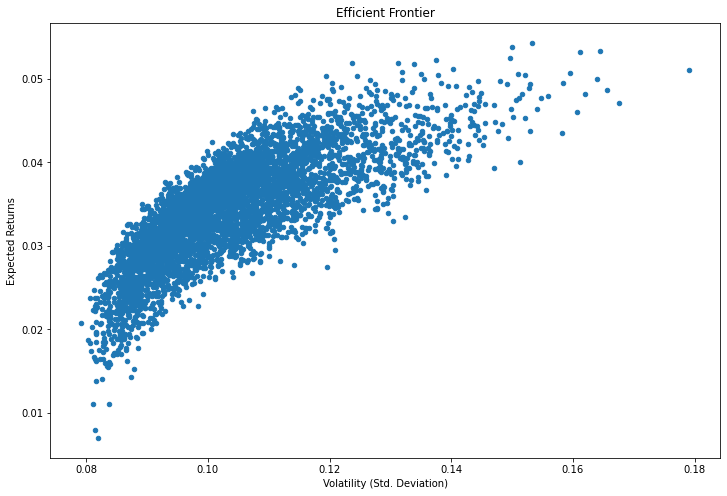

In [14]:
portfolios.plot.scatter(x='Volatility', y='Returns', figsize=(12,8))
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

At this point we know how to visualize the range of possible portfolios. 
We still have not found the set of portfolios that optimize for both the expected return and risk of our assets. 
We will use a function that we developed, called optimal_portfolio(), to find mean-variance optimized portfolios.

In [15]:
# CVXOPT is a free software package for convex optimization
# https://cvxopt.org/index.html
import cvxopt as opt
from cvxopt import blas, solvers

In [16]:
def optimal_portfolio(returns):
    n = returns.shape[1]
    returns = np.transpose(returns.to_numpy())

    N = 100
    mus = [10**(5.0 * t/N - 1.0) for t in range(N)]

    # Convert to cvxopt matrices
    S = opt.matrix(np.cov(returns))
    pbar = opt.matrix(np.mean(returns, axis=1))

    # Create constraint matrices
    G = -opt.matrix(np.eye(n))   # negative n x n identity matrix
    h = opt.matrix(0.0, (n ,1))
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)

    # Calculate efficient frontier weights using quadratic programming
    portfolios = [solvers.qp(mu*S, -pbar, G, h, A, b)['x']
                  for mu in mus]
    ## CALCULATE RISKS AND RETURNS FOR FRONTIER
    returns = [blas.dot(pbar, x) for x in portfolios]
    risks = [np.sqrt(blas.dot(x, S*x)) for x in portfolios]
    ## CALCULATE THE 2ND DEGREE POLYNOMIAL OF THE FRONTIER CURVE
    m1 = np.polyfit(returns, risks, 2)
    x1 = np.sqrt(m1[2] / m1[0])
    # CALCULATE THE OPTIMAL PORTFOLIO
    wt = solvers.qp(opt.matrix(x1 * S), -pbar, G, h, A, b)['x']
    return np.asarray(wt), returns, risks

In [17]:
weights, returns, risks = optimal_portfolio(returns)

     pcost       dcost       gap    pres   dres
 0: -3.6910e-02 -1.0606e+00  1e+00  2e-16  3e+00
 1: -3.7860e-02 -7.0546e-02  3e-02  5e-17  9e-02
 2: -5.6522e-02 -6.1228e-02  5e-03  3e-16  4e-17
 3: -5.8910e-02 -5.9232e-02  3e-04  2e-18  2e-17
 4: -5.9195e-02 -5.9202e-02  7e-06  3e-16  2e-17
 5: -5.9202e-02 -5.9202e-02  7e-08  2e-16  1e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.6835e-02 -1.0604e+00  1e+00  0e+00  3e+00
 1: -3.7780e-02 -7.0358e-02  3e-02  7e-17  9e-02
 2: -5.6232e-02 -6.0905e-02  5e-03  1e-16  2e-17
 3: -5.8543e-02 -5.8888e-02  3e-04  2e-16  1e-17
 4: -5.8838e-02 -5.8849e-02  1e-05  2e-16  2e-17
 5: -5.8849e-02 -5.8849e-02  1e-07  2e-16  2e-17
 6: -5.8849e-02 -5.8849e-02  1e-09  1e-16  9e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.6751e-02 -1.0602e+00  1e+00  0e+00  3e+00
 1: -3.7691e-02 -7.0148e-02  3e-02  9e-17  9e-02
 2: -5.5918e-02 -6.0547e-02  5e-03  7e-17  2e-17
 3: -5.8147e-02 -5.8507e

     pcost       dcost       gap    pres   dres
 0: -2.7198e-02 -1.0491e+00  1e+00  2e-16  3e+00
 1: -2.7700e-02 -5.9052e-02  3e-02  1e-16  9e-02
 2: -3.8763e-02 -4.5357e-02  7e-03  4e-16  9e-18
 3: -4.0909e-02 -4.1253e-02  3e-04  1e-16  1e-17
 4: -4.1109e-02 -4.1112e-02  4e-06  1e-16  8e-18
 5: -4.1111e-02 -4.1111e-02  4e-08  2e-16  9e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.6021e-02 -1.0485e+00  1e+00  0e+00  3e+00
 1: -2.6491e-02 -5.8341e-02  3e-02  1e-16  9e-02
 2: -3.6981e-02 -4.3904e-02  7e-03  2e-16  5e-18
 3: -3.9170e-02 -3.9658e-02  5e-04  1e-16  1e-17
 4: -3.9446e-02 -3.9452e-02  6e-06  2e-16  1e-17
 5: -3.9449e-02 -3.9449e-02  6e-08  1e-16  9e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.4720e-02 -1.0477e+00  1e+00  0e+00  3e+00
 1: -2.5159e-02 -5.7517e-02  3e-02  6e-17  9e-02
 2: -3.5041e-02 -4.2234e-02  7e-03  5e-17  2e-17
 3: -3.7265e-02 -3.7851e-02  6e-04  1e-16  1e-17
 4: -3.7607e-02 -3.7616e

 6:  3.9819e-02  3.9818e-02  4e-07  1e-16  4e-17
 7:  3.9818e-02  3.9818e-02  6e-09  2e-16  3e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  5.7178e-02 -9.7462e-01  1e+00  0e+00  3e+00
 1:  5.5368e-02  2.1918e-02  3e-02  9e-17  1e-01
 2:  4.9615e-02  4.6427e-02  3e-03  1e-16  3e-03
 3:  4.7948e-02  4.7679e-02  3e-04  2e-16  5e-17
 4:  4.7805e-02  4.7777e-02  3e-05  1e-16  5e-17
 5:  4.7790e-02  4.7787e-02  4e-06  3e-17  5e-17
 6:  4.7788e-02  4.7788e-02  3e-07  4e-17  6e-17
 7:  4.7788e-02  4.7788e-02  4e-09  1e-16  8e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  6.6820e-02 -9.6710e-01  1e+00  0e+00  3e+00
 1:  6.4785e-02  2.9690e-02  4e-02  9e-17  1e-01
 2:  5.8439e-02  5.4950e-02  3e-03  6e-17  3e-03
 3:  5.6735e-02  5.6477e-02  3e-04  1e-16  8e-17
 4:  5.6594e-02  5.6567e-02  3e-05  8e-17  7e-17
 5:  5.6579e-02  5.6576e-02  3e-06  2e-16  3e-17
 6:  5.6577e-02  5.6576e-02  3e-07  1e-16  4e-17
 7:  5.6576e-02  5.6576

Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.0591e+00 -6.3300e-02  9e+00  3e+00  4e+00
 1:  1.1227e+00  3.0799e-01  8e-01  3e-16  6e-16
 2:  1.0791e+00  9.8499e-01  9e-02  2e-16  9e-16
 3:  1.0532e+00  1.0452e+00  8e-03  4e-17  8e-16
 4:  1.0507e+00  1.0503e+00  4e-04  1e-16  6e-16
 5:  1.0505e+00  1.0505e+00  2e-05  1e-16  5e-16
 6:  1.0505e+00  1.0505e+00  5e-07  1e-16  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.1836e+00  6.0526e-02  9e+00  3e+00  4e+00
 1:  1.2531e+00  4.3727e-01  8e-01  4e-16  8e-16
 2:  1.2076e+00  1.1163e+00  9e-02  7e-17  7e-16
 3:  1.1828e+00  1.1755e+00  7e-03  1e-16  9e-16
 4:  1.1806e+00  1.1803e+00  4e-04  3e-17  7e-16
 5:  1.1805e+00  1.1805e+00  2e-05  2e-16  1e-15
 6:  1.1805e+00  1.1805e+00  3e-07  2e-16  1e-15
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.3229e+00  1.9972e-01  9e+00  3e+00  4e+00
 1:  1.3985e+00  5.8267e-01  8e-01  3e-16  1e-15


     pcost       dcost       gap    pres   dres
 0:  1.2796e+01  1.1740e+01  1e+01  3e+00  4e+00
 1:  1.2869e+01  1.2340e+01  2e+00  4e-01  6e-01
 2:  1.3541e+01  1.3073e+01  5e-01  5e-17  8e-15
 3:  1.3400e+01  1.3382e+01  2e-02  2e-16  7e-15
 4:  1.3392e+01  1.3391e+01  4e-04  6e-17  3e-15
 5:  1.3392e+01  1.3392e+01  5e-06  1e-16  6e-15
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.4355e+01  1.3301e+01  1e+01  3e+00  4e+00
 1:  1.4423e+01  1.3913e+01  2e+00  5e-01  6e-01
 2:  1.5234e+01  1.4674e+01  6e-01  1e-16  2e-14
 3:  1.5039e+01  1.5017e+01  2e-02  1e-16  7e-15
 4:  1.5028e+01  1.5027e+01  4e-04  2e-16  9e-15
 5:  1.5027e+01  1.5027e+01  4e-06  2e-16  8e-15
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.6104e+01  1.5054e+01  1e+01  3e+00  4e+00
 1:  1.6167e+01  1.5676e+01  2e+00  5e-01  7e-01
 2:  1.7146e+01  1.6469e+01  7e-01  2e-16  2e-14
 3:  1.6880e+01  1.6852e+01  3e-02  1e-16  2e-14
 4:  1.6863e+01  1.6863e

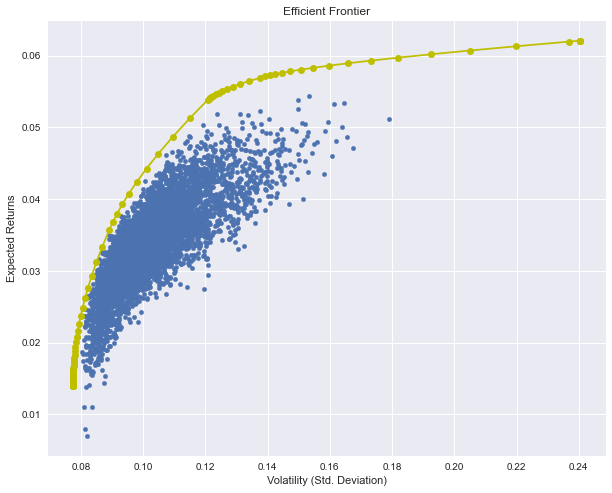

In [18]:
plt.style.use('seaborn')
portfolios.plot.scatter(x='Volatility', y='Returns', figsize=(10, 8), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.plot(risks, returns, 'y-o')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

## Diverse Portfolios decreased variance

Leets check how my portofolio reacts when another asset is introduced.
In this case im going to add Nvidia

In [19]:
nvidia = pd.read_csv('stock_data_nvidia.txt', index_col='Date', parse_dates=True)
nvidia.head()


,Delta,Jet Blue,Chevron,Exxon,Adobe,Honeywell,Nvidia
Date,,,,,,,
2007-12-31,14.64,5.94,94.37,94.39,42.58,60.89,34.51
2008-03-31,8.65,5.45,84.95,85.69,35.69,55.72,19.89
2008-06-30,5.42,3.58,98.30,86.81,39.63,49.26,19.06
2008-09-30,7.50,4.70,78.85,75.62,36.72,41.55,10.26
2008-12-31,10.97,6.80,72.90,78.42,20.85,32.61,7.92


In [20]:
returns2 = nvidia.pct_change()
returns2.dropna(inplace=True)
returns2.head()

,Delta,Jet Blue,Chevron,Exxon,Adobe,Honeywell,Nvidia
Date,,,,,,,
2008-03-31,-0.409153,-0.082492,-0.099820,-0.092171,-0.161813,-0.084907,-0.423645
2008-06-30,-0.373410,-0.343119,0.157151,0.013070,0.110395,-0.115937,-0.041730
2008-09-30,0.383764,0.312849,-0.197864,-0.128902,-0.073429,-0.156516,-0.461700
2008-12-31,0.462667,0.446809,-0.075460,0.037027,-0.432190,-0.215162,-0.228070
2009-03-31,-0.491340,-0.429412,-0.074897,-0.119612,0.003837,-0.141674,0.255051


In [21]:
# expected returns
e_ret2 = returns2.mean()
e_ret2

Delta        0.062093
Jet Blue     0.052361
Chevron      0.010323
Exxon       -0.002444
Adobe        0.053780
Honeywell    0.028439
Nvidia       0.075316
dtype: float64

In [22]:
# COVARIANCE
cov2 = returns2.cov()
cov2

,Delta,Jet Blue,Chevron,Exxon,Adobe,Honeywell,Nvidia
Delta,0.057825,0.037921,-0.000407,0.002053,0.004228,0.008055,0.006847
Jet Blue,0.037921,0.044951,-0.001776,0.002404,-0.001467,0.005532,-0.001683
Chevron,-0.000407,-0.001776,0.010988,0.007023,0.004638,0.007022,0.011866
Exxon,0.002053,0.002404,0.007023,0.007233,0.003111,0.006190,0.006494
Adobe,0.004228,-0.001467,0.004638,0.003111,0.022535,0.011297,0.017288
Honeywell,0.008055,0.005532,0.007022,0.006190,0.011297,0.013206,0.011908
Nvidia,0.006847,-0.001683,0.011866,0.006494,0.017288,0.011908,0.051331


In [23]:
# Standar deviation x asset
single_asset_std = np.sqrt(np.diagonal(cov2))
single_asset_std

array([0.24046798, 0.21201543, 0.10482314, 0.08504473, 0.15011539,
       0.11491787, 0.22656316])

In [24]:
new_port = return_portfolios(e_ret2, cov2)
new_port.head()

,Returns,Volatility,Delta Weight,Jet Blue Weight,Chevron Weight,Exxon Weight,Adobe Weight,Honeywell Weight,Nvidia Weight
0,0.046870,0.137695,0.223587,0.386202,0.000061,0.162096,0.078683,0.049507,0.099863
1,0.044857,0.108467,0.099639,0.114404,0.155362,0.120871,0.197576,0.058952,0.253196
2,0.040255,0.106186,0.009736,0.238339,0.148344,0.198604,0.049905,0.070421,0.284650
3,0.034894,0.099347,0.250255,0.081007,0.178936,0.226510,0.231218,0.021980,0.010094
4,0.046742,0.106994,0.045284,0.234149,0.026223,0.112285,0.255413,0.142164,0.184483


In [25]:
weights2, returns2, risks2 = optimal_portfolio(returns2)

     pcost       dcost       gap    pres   dres
 0: -4.4204e-02 -1.0743e+00  1e+00  1e-16  3e+00
 1: -4.5321e-02 -8.4257e-02  4e-02  1e-16  1e-01
 2: -6.9792e-02 -7.9290e-02  9e-03  4e-16  2e-03
 3: -7.2269e-02 -7.2819e-02  6e-04  1e-16  8e-05
 4: -7.2744e-02 -7.2750e-02  6e-06  4e-16  7e-07
 5: -7.2749e-02 -7.2749e-02  6e-08  7e-20  7e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -4.4123e-02 -1.0742e+00  1e+00  0e+00  3e+00
 1: -4.5235e-02 -8.4128e-02  4e-02  9e-17  1e-01
 2: -6.9492e-02 -7.9001e-02  1e-02  2e-16  1e-03
 3: -7.1935e-02 -7.2508e-02  6e-04  3e-17  7e-05
 4: -7.2430e-02 -7.2437e-02  7e-06  1e-16  6e-07
 5: -7.2436e-02 -7.2436e-02  7e-08  1e-16  6e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -4.4032e-02 -1.0740e+00  1e+00  2e-16  3e+00
 1: -4.5139e-02 -8.3983e-02  4e-02  1e-16  1e-01
 2: -6.9161e-02 -7.8676e-02  1e-02  3e-17  1e-03
 3: -7.1562e-02 -7.2160e-02  6e-04  1e-16  6e-05
 4: -7.2077e-02 -7.2085e

 4: -5.4931e-02 -5.4968e-02  4e-05  1e-16  1e-17
 5: -5.4938e-02 -5.4939e-02  9e-07  2e-16  1e-17
 6: -5.4938e-02 -5.4938e-02  9e-09  1e-16  1e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.7562e-02 -1.0637e+00  1e+00  2e-16  3e+00
 1: -3.8363e-02 -7.3452e-02  4e-02  9e-17  1e-01
 2: -5.1321e-02 -5.8702e-02  7e-03  6e-17  2e-17
 3: -5.3138e-02 -5.3592e-02  5e-04  5e-17  2e-17
 4: -5.3309e-02 -5.3318e-02  9e-06  4e-17  2e-17
 5: -5.3311e-02 -5.3311e-02  9e-08  1e-16  3e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.6699e-02 -1.0623e+00  1e+00  2e-16  3e+00
 1: -3.7464e-02 -7.2010e-02  3e-02  2e-16  1e-01
 2: -4.9631e-02 -5.6482e-02  7e-03  1e-16  4e-17
 3: -5.1562e-02 -5.1744e-02  2e-04  1e-16  2e-17
 4: -5.1664e-02 -5.1666e-02  2e-06  4e-17  1e-17
 5: -5.1666e-02 -5.1666e-02  2e-08  1e-16  2e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.5738e-02 -1.0607e+00  1e+00  0e+00  3e+00


 3:  8.9319e-03  8.3349e-03  6e-04  2e-16  3e-17
 4:  8.7379e-03  8.6889e-03  5e-05  2e-16  3e-17
 5:  8.7185e-03  8.7146e-03  4e-06  1e-16  3e-17
 6:  8.7159e-03  8.7158e-03  1e-07  1e-16  2e-17
 7:  8.7158e-03  8.7158e-03  1e-09  8e-17  3e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.1174e-02 -9.9974e-01  1e+00  0e+00  3e+00
 1:  2.0515e-02 -8.1028e-03  3e-02  2e-16  9e-02
 2:  1.5844e-02  1.1981e-02  4e-03  2e-16  5e-03
 3:  1.4267e-02  1.3755e-02  5e-04  1e-16  2e-17
 4:  1.4096e-02  1.4056e-02  4e-05  1e-16  3e-17
 5:  1.4081e-02  1.4078e-02  3e-06  1e-16  4e-17
 6:  1.4079e-02  1.4079e-02  2e-07  2e-16  3e-17
 7:  1.4079e-02  1.4079e-02  2e-09  1e-16  6e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.7740e-02 -9.9275e-01  1e+00  1e-16  3e+00
 1:  2.6888e-02 -9.9221e-04  3e-02  7e-17  8e-02
 2:  2.1544e-02  1.7815e-02  4e-03  1e-16  5e-03
 3:  1.9972e-02  1.9533e-02  4e-04  1e-16  3e-17
 4:  1.9806e-02  1.9762

 5:  3.6292e-01  3.6287e-01  5e-05  1e-16  3e-16
 6:  3.6289e-01  3.6289e-01  5e-06  2e-16  2e-16
 7:  3.6289e-01  3.6289e-01  8e-08  1e-16  3e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  4.3023e-01 -6.6418e-01  1e+01  3e+00  4e+00
 1:  4.7597e-01 -3.4998e-01  8e-01  5e-16  1e-15
 2:  4.4387e-01  3.4030e-01  1e-01  7e-17  5e-16
 3:  4.1499e-01  4.0183e-01  1e-02  2e-16  4e-16
 4:  4.0951e-01  4.0872e-01  8e-04  4e-17  3e-16
 5:  4.0913e-01  4.0908e-01  5e-05  1e-16  2e-16
 6:  4.0910e-01  4.0909e-01  4e-06  1e-16  2e-16
 7:  4.0909e-01  4.0909e-01  6e-08  1e-16  3e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  4.8043e-01 -6.1604e-01  1e+01  3e+00  4e+00
 1:  5.2904e-01 -2.9515e-01  8e-01  5e-16  7e-16
 2:  4.9555e-01  3.9211e-01  1e-01  2e-16  2e-16
 3:  4.6653e-01  4.5397e-01  1e-02  2e-16  3e-16
 4:  4.6129e-01  4.6055e-01  7e-04  1e-16  2e-16
 5:  4.6095e-01  4.6090e-01  4e-05  1e-16  3e-16
 6:  4.6092e-01  4.6091

 1:  6.4012e+00  5.8083e+00  2e+00  3e-01  4e-01
 2:  6.6132e+00  6.4127e+00  4e-01  6e-02  8e-02
 3:  6.7141e+00  6.6796e+00  4e-02  3e-04  4e-04
 4:  6.7057e+00  6.7038e+00  2e-03  5e-06  7e-06
 5:  6.7048e+00  6.7047e+00  1e-04  5e-08  6e-08
 6:  6.7047e+00  6.7047e+00  4e-06  3e-10  4e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  7.0653e+00  6.0228e+00  1e+01  3e+00  4e+00
 1:  7.1613e+00  6.5895e+00  2e+00  3e-01  5e-01
 2:  7.3893e+00  7.1966e+00  5e-01  8e-02  1e-01
 3:  7.5417e+00  7.4880e+00  5e-02  1e-16  9e-15
 4:  7.5258e+00  7.5233e+00  3e-03  2e-16  4e-15
 5:  7.5247e+00  7.5245e+00  2e-04  1e-16  3e-15
 6:  7.5245e+00  7.5245e+00  5e-06  3e-17  5e-15
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  7.9234e+00  6.8846e+00  1e+01  3e+00  4e+00
 1:  8.0146e+00  7.4639e+00  2e+00  4e-01  5e-01
 2:  8.2655e+00  8.0842e+00  5e-01  9e-02  1e-01
 3:  8.4723e+00  8.3938e+00  8e-02  1e-16  3e-14
 4:  8.4461e+00  8.4429

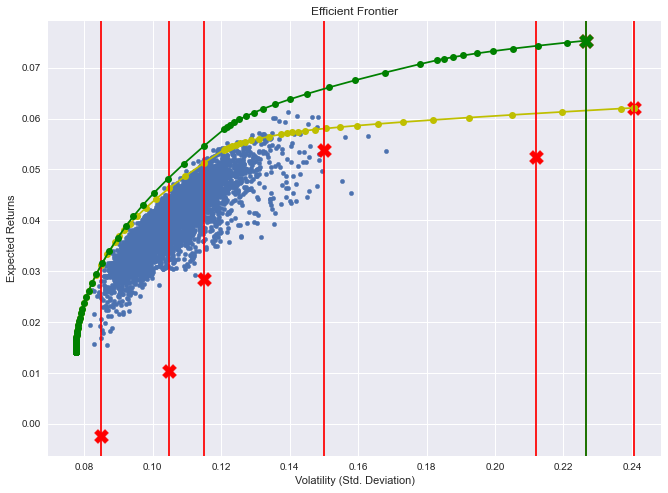

In [26]:
plt.style.use('seaborn')
new_port.plot.scatter(x='Volatility', y='Returns', figsize=(11, 8), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.plot(risks, returns, 'y-o')

plt.scatter(single_asset_std, e_ret2, marker='X', color='red', s=200)
for xc in single_asset_std:
    plt.axvline(x=xc, color='red')


plt.axvline(single_asset_std[-1], color='green')
plt.scatter(single_asset_std[-1],e_ret2[-1],marker='X',color='green',s=200)
original_EF=np.genfromtxt("stock_risk_returns.csv", delimiter=',')
plt.plot(risks2, returns2, 'g-o')
plt.plot(original_EF[:,0],original_EF[:,1], 'y-o')

plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

With Nvidia in the portfolio. Nvidia is a high-risk, high-return asset. Despite Nvidia’s risk, it improved the efficient frontier by increasing the expected return at most standard deviations. This is evident by the shift of the efficient frontier up and to the left.

In this example, a high-risk, high-return asset increased the expected return of portfolios on the efficient frontier. This is because the new asset had a larger expected return than any other asset.

    To decrease the risk of portfolios on an efficient frontier, you should add assets that are uncorrelated to assets in your portfolio.

Unlike with expected return, the risk of an individual asset does not indicate whether it will affect the risk of the overall portfolio. An uncorrelated asset increases the diversity of your portfolio, which protects you from a downturn that may affect a subset of your assets.